In [8]:
pip install -q pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import time
from datetime import datetime
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reggl\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [3]:
# Retrieve Data
stock_symbol = 'TSLA'
df = web.DataReader(stock_symbol, data_source='yahoo', start='1970-01-01', end='2019-12-17')
# Show Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2019-12-12,362.739990,353.230011,354.920013,359.679993,7763900,359.679993
2019-12-13,365.209991,354.640015,361.049988,358.390015,6570900,358.390015
2019-12-16,383.609985,362.500000,362.549988,381.500000,18174200,381.500000


In [4]:
# Get the number of rows and columns in the data set
df.shape

(2386, 6)

C:\Users\reggl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


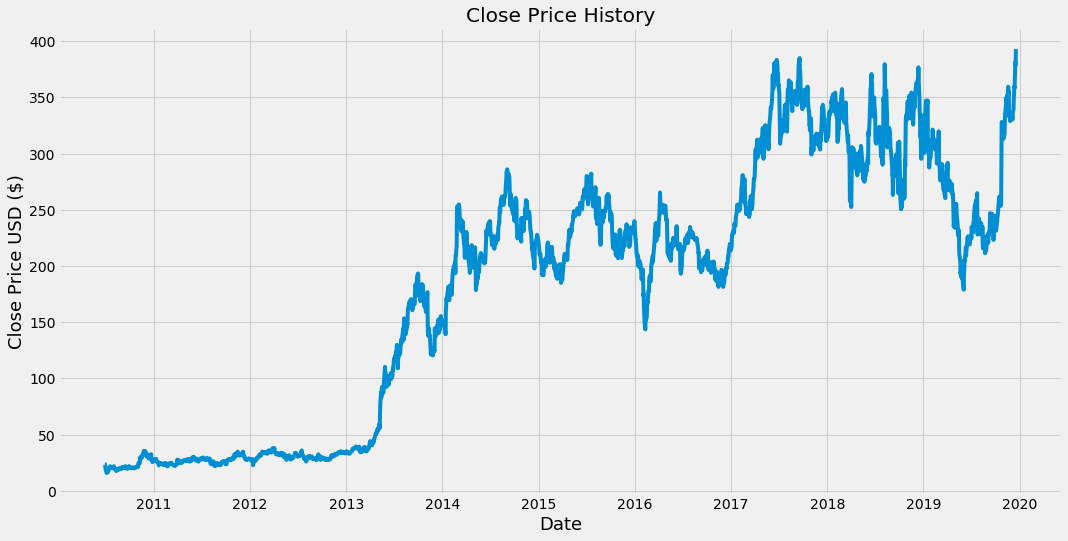

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
# Output length
training_data_len

1909

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02143898],
       [0.02127998],
       [0.01632436],
       ...,
       [0.96912682],
       [0.96247515],
       [1.        ]])

In [14]:
# Create training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  # Train on last 60 values and save to x_train
  x_train.append(train_data[i-60:i, 0])
  # Put 61st value in y_train?
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.02143898, 0.02127998, 0.01632436, 0.0090102 , 0.00082152,
       0.        , 0.0043991 , 0.00424009, 0.00331257, 0.00620114,
       0.01070624, 0.01083874, 0.01282629, 0.01619186, 0.01192527,
       0.01171326, 0.01378031, 0.01454883, 0.01364781, 0.01258778,
       0.01303829, 0.01205777, 0.01097125, 0.01356831, 0.01629787,
       0.01446933, 0.01232278, 0.01004373, 0.01007023, 0.00855969,
       0.00556512, 0.00477011, 0.00667815, 0.00789718, 0.0088777 ,
       0.00787068, 0.00792368, 0.0087452 , 0.01147476, 0.0090102 ,
       0.01086524, 0.01046774, 0.01033523, 0.01078574, 0.00975222,
       0.01232278, 0.01393931, 0.01391281, 0.01256128, 0.0135153 ,
       0.01301179, 0.01158076, 0.01303829, 0.01409832, 0.01637737,
       0.01362131, 0.01173976, 0.01393931, 0.0131708 , 0.01078574])]
[0.009964222440505717]

[array([0.02143898, 0.02127998, 0.01632436, 0.0090102 , 0.00082152,
       0.        , 0.0043991 , 0.00424009, 0.00331257, 0.00620114,
       0.01070624, 0.01083874, 0.0

In [15]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1849, 60, 1)

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1849/1849 [==============================] - 217s 117ms/sample - loss: 0.0019


In [20]:
# Create the testing data set
# Create a new array containing scaled values from index N to N
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Get the models predicted prices values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
# Get the root mean squared error (RMSE) "lower values indicate better fit"
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1.8421324404030726

C:\Users\reggl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


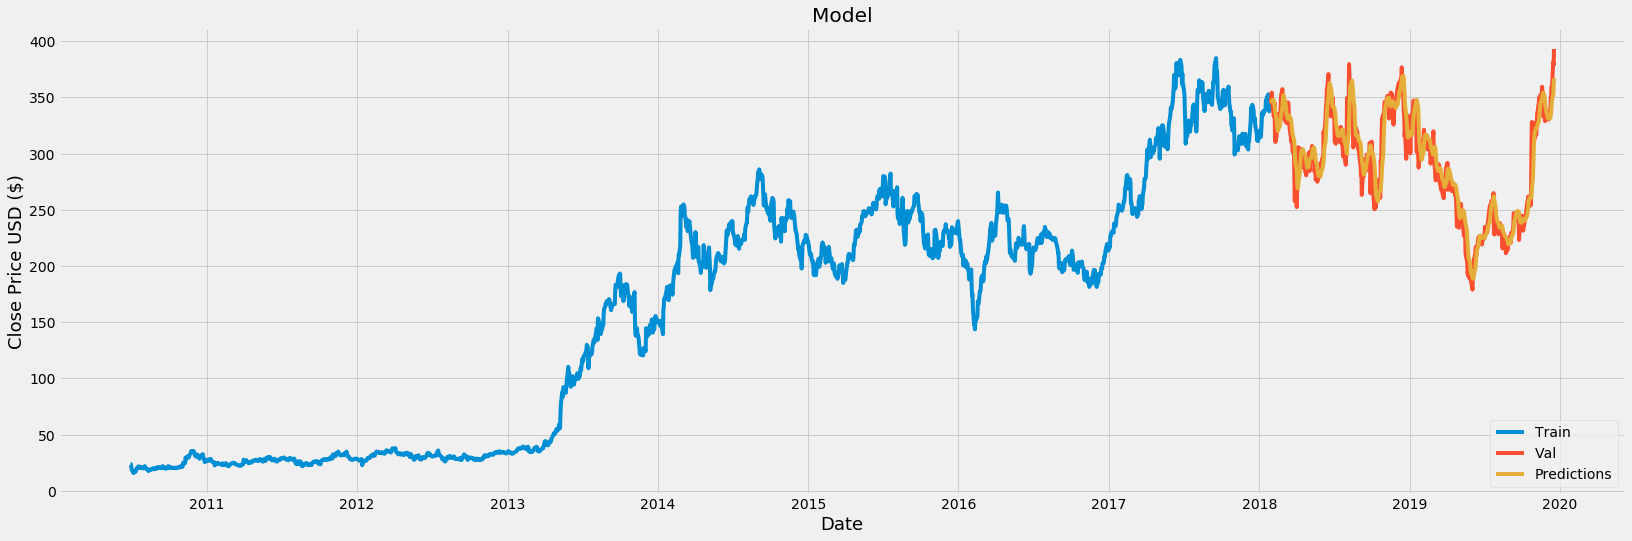

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(25,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-01-29,349.529999,347.748779
2018-01-30,345.820007,347.070831
2018-01-31,354.309998,346.413971
2018-02-01,349.250000,347.302063
2018-02-02,343.750000,347.954376
...,...,...
2019-12-12,359.679993,341.588684
2019-12-13,358.390015,347.062103
2019-12-16,381.500000,351.982910


In [27]:
# Get the quote
stock_quote = web.DataReader(stock_symbol, data_source='yahoo', start='1970-01-01', end='2019-12-17')
# Create a new dataframe
new_df = stock_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) 

[[375.25424]]


In [28]:
# Get the actual quote
stock_quote2 = web.DataReader(stock_symbol, data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(stock_quote2['Close'])

Date
2019-12-18    393.149994
2019-12-19    404.040009
Name: Close, dtype: float64
